<a href="https://colab.research.google.com/github/AparnaSundriyal/MNIST-Handwritten-Digit-Classification/blob/main/Copy_of_mnist_handwritten_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sms
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix




Loading the MNIST from keras.dataset

In [23]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [24]:
type(X_train)

numpy.ndarray

In [25]:
#shape of the numpy array
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data=60000 images
Test data=10000 images
image dimension -> 28 x 28
Grayscale -> 1 channel

In [26]:
#printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [27]:
print(X_train[10].shape)

(28, 28)


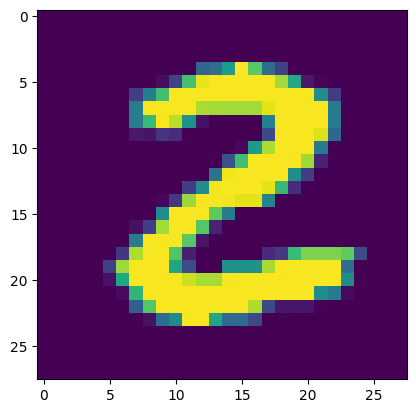

2


In [28]:
#displaying the images
plt.imshow(X_train[25])
plt.show()

#print the coresponding labels
print(Y_train[25])

image labels

In [29]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [30]:
#unique values in Y_train
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [31]:
#unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]


we can use these labels as such or we can apply one hot coding

All the images have the same dimension in this dataset,if not we have to resize all the images to a common dimension

In [32]:
#scaling the values

X_train=X_train/255
X_test=X_test/255

In [33]:
#printing the 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

building the neural network

In [34]:
#setting up the layers of neural network
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid'),
  ])


In [35]:
#compiling the neural network
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
#training the neural network
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3072 - accuracy: 0.9114
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1417 - accuracy: 0.9577
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1052 - accuracy: 0.9683
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0865 - accuracy: 0.9740
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0713 - accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0611 - accuracy: 0.9809
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0541 - accuracy: 0.9826
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0484 - accuracy: 0.9847
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0419 - accuracy: 0.9863
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0

training data accuracy=98.9%

Accuracy on test data

In [37]:
loss,accuracy=model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0999 - accuracy: 0.9736


Test data accuracy=97.1%

In [38]:
print(X_test.shape)

(10000, 28, 28)


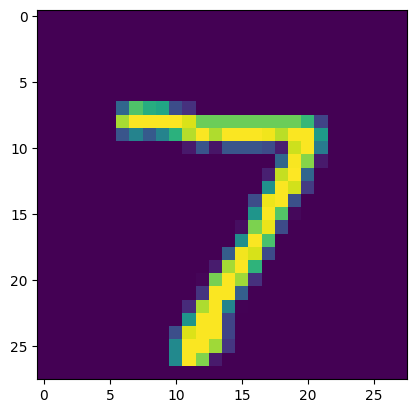

In [39]:
#first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [40]:
print(Y_test[0])

7


In [41]:
Y_pred=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [42]:
print(Y_pred.shape)

(10000, 10)


In [43]:
print(Y_pred[0])

[3.4982892e-04 6.5240487e-02 6.5835193e-02 8.2873291e-01 3.0853287e-10
 2.3035840e-03 8.4247213e-11 9.9995679e-01 1.3150053e-01 8.5055035e-01]


model.predict gives the prediction probability of each class for that data point

In [44]:
#covering the prediction probabilities to class label
label_for_first_test_image=np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [45]:
#converting the prediction probabilities to class  label for all test data points
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 1, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test->True labels

Y_pred_labels->Prediction labels

ConfusionMatrix

In [46]:
conf_mat = confusion_matrix(Y_test,Y_pred_labels)

In [47]:
print(conf_mat)

tf.Tensor(
[[ 966    0    1    1    1    4    3    1    2    1]
 [   0 1122    1    2    0    1    3    0    5    1]
 [   2    4  993    7    5    0    2    6   13    0]
 [   0    0    1  966    0   31    0    3    6    3]
 [   2    0    1    0  964    2    3    2    3    5]
 [   2    0    0    3    1  877    2    1    4    2]
 [   2    3    2    1    5   12  930    0    3    0]
 [   1    6   13    3    3    0    0  988    6    8]
 [   2    1    0    5    4    9    0    1  947    5]
 [   1    3    0    3    8    6    0    4    1  983]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Prediction Labels')

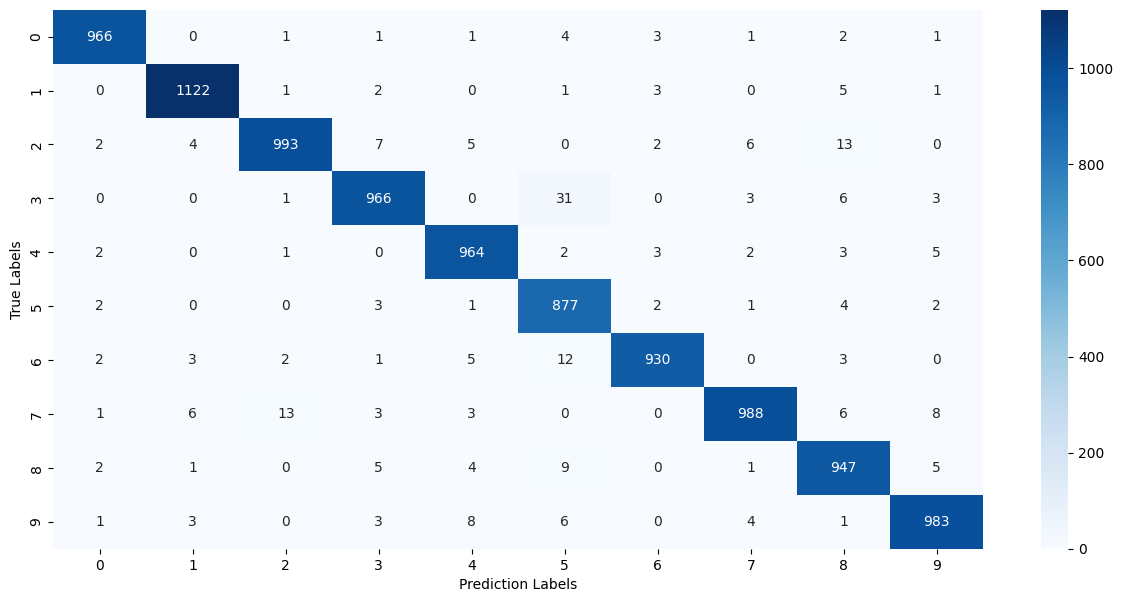

In [48]:
plt.figure(figsize=(15,7))
sms.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Prediction Labels')

Building a Predictive System

In [49]:
input_image_path='/content/images (2).png'
input_image=cv2.imread(input_image_path)

In [50]:
type(input_image)

numpy.ndarray

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


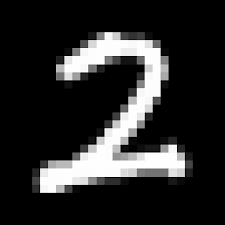

In [51]:
print(input_image)
cv2_imshow(input_image)

cv2_imshow(input_image)

In [52]:
input_image.shape

(225, 225, 3)

In [53]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [54]:
grayscale.shape

(225, 225)

In [55]:
input_image_resize=cv2.resize(grayscale,(28,28))

In [56]:
input_image_resize.shape

(28, 28)

In [57]:
cv2_imshow(input_image_resize)

In [58]:
input_image_resize=input_image_resize/255

In [59]:
image_reshaped=np.reshape(input_image_resize,[1,28,28])

In [60]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 24ms/step
[[3.8029926e-03 7.6373732e-01 9.9998200e-01 9.8586798e-01 3.2526584e-10
  2.8837712e-03 1.2916987e-12 2.9351853e-02 2.0139726e-04 2.8005628e-05]]


In [61]:
input_pred_label=np.argmax(input_prediction)

In [62]:
print(input_pred_label)

2


Predictive System

In [63]:
input_image_path=input('Path of the image to be predicted')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

input_image_resize=cv2.resize(grayscale,(28,28))

input_image_resize=input_image_resize/255

image_reshaped=np.reshape(input_image_resize,[1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label=np.argmax(input_prediction)

print('The handwritten digit is recognised as: ',input_pred_label)

Path of the image to be predicted/content/mnist_input_0 (2).png


1/1 [==============================] - 0s 40ms/step
The handwritten digit is recognised as:  5
